# Bisections, Newton-Raphson and constrained Newton methods

Two very important algorithms for solving equations + a combined algorithm for efficient solving particularly
nasty constrained optimization. Only one dimensional case is considered here.

Import the libraries and prepare for plotting

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

def multiplot(fun,a=0,b=1,label='',show=False,legend=False,color='red'):
    '''Plots function fun on interval [a,b], or a dot if fun=[x,y], or vertical line if fun=[x]'''
    figure(num=1, figsize=(10,8))
    if callable(fun):
        # function
        x = np.linspace(a,b,1000)
        y = [fun(x) for x in x]
        plt.plot(x,y,label=label,c=color)
        plt.xlim((a,b))
        plt.grid(True)
    elif isinstance(fun,list) and len(fun) in (3,4): # line
        if len(fun) == 3: # fun=[x ymin ymax]
            x, y = [fun[0],fun[0]], fun[1:] # vertical
        else: # fun=[x1 y1 x2 y2]
            x, y = fun[::2], fun[1::2]
        plt.plot(x,y,label=label,c=color)
    elif isinstance(fun,list) and len(fun)==2: # one dot
        x, y = fun
        plt.scatter(x,y,label=label,c=color)
    if legend:
        plt.legend()
    if show:
        plt.show()

## Bisection method for solving equations

Solve equation $ g(x)=0 $, conditional on $ x \in [a,b] \subset \mathbb{R} $ such that $ g(a)g(b)<0 $

Algorithm: binary search in continuous space

In [451]:
def bisection(fun, lower=0, upper=1, tol=1e-6, maxiter=100, callback=None):
    '''Bisection method to solve fun(x)=0,
       assuming root is between lower and upper.
       Callback function arguments (iter,x,lower,upper)
    '''
    if fun(lower)*fun(upper)>0:
        raise(ValueError('Bad initial lower and upper limits'))
    for iter in range(maxiter):
        x = (lower+upper)/2
        if callback:
            callback(iter,x,lower,upper)
        if fun(lower)*fun(x)>0:
            lower = x
        else:
            upper = x
        if np.abs(upper-lower)<tol:
            return (lower+upper)/2
    else:
        raise(RuntimeError('Failed to converge, increase maxiter'))

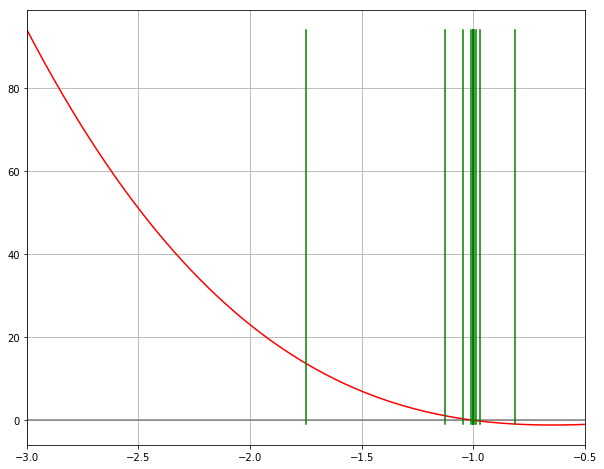

Solution is  -0.9999998211860657


In [452]:
# solve an equation and illustrate
fun = lambda x: -4*x**3+5*x+1
a,b = -3,-.5
ylim=[fun(a),min(fun(b),0)]
multiplot([a,0,b,0],color='grey')
multiplot(fun,a=a,b=b,color='red')
callback = lambda iter,x,a,b: multiplot([x,ylim[0],x,ylim[1]],a=a,b=b,color='green')
root = bisection(fun,lower=a,upper=b,callback=callback)
plt.show()
print('Solution is ',root)

## Newton (Newton-Raphson) method

Solve equation $ g(x)=0 $ where $ g(x) $ is a differentiable function.

Algorithm:
1. Start with some good guess $ x_0 $ not too far from the solution
2. Newton step: $ x_{i+1} = x_i - \frac{g(x_i)}{g'(x_i)} $
3. Iterate until convergence in some metric

### Derivation for Newton method using Taylor series expansion

$$
g(x) = \sum_{k=0}^{\infty} \frac{g^{(k)}(x_0)}{k!} (x-x_0)^k
$$

Take first two terms, assume $ g(x) $ is solution, and let
$ x_0=x_i $ and $ x=x_{i+1} $

$$
0 = g(x) = g(x_i) + g'(x_i) (x_{i+1}-x_i) \quad \Rightarrow \quad x_{i+1} = x_i - \frac{g(x_i)}{g'(x_i)}
$$

In [453]:
def newton(fun, grad, x0, tol=1e-12, maxiter=100, callback=None):
    '''Newton method to solve fun(x)=0
       Callback function arguments (iter,x,x1,err)
    '''
    x=x0
    for iter in range(maxiter):
        x1 = x - fun(x)/grad(x)
        err = np.abs(x1-x)
        if callback:
            callback(iter,x,x1,err)
        if err < tol:
            return x1
        x = x1
    else:
        raise(RuntimeError('Failed to converge, increase maxiter'))

Create and run example with different starting values

In [454]:
def newton_viz(x0,a,b):
    g = lambda x: -4*x**3+5*x+1
    h = lambda x: -12*x**2+5
    ylim=[g(a),min(g(b),0)]
    def callback(iter,x,x1,err):
        print('iter=%3d x=%12.8f err=%1.3e' % (iter,x,err))
        if err>0.01: # plot only if sufficiently far from the solution
            multiplot([a,0,b,0],color='grey')
            plt.title('Step %d' % iter)
            multiplot(g,a=a,b=b,color='red')
            multiplot([x,0],a=a,b=b,color='green')
            multiplot([x,0,g(x)],a=a,b=b,color='green')
            multiplot([x,0,fun(x)],a=a,b=b,color='green')
            multiplot(lambda z: h(x)*(z - x1),a=a,b=b,color='blue')
            multiplot([x,0],a=a,b=b,color='red',show=True)
    root = newton(g, h, x0, callback=callback)
    print('Solution is ',root)

iter=  0 x= -2.50000000 err=7.286e-01


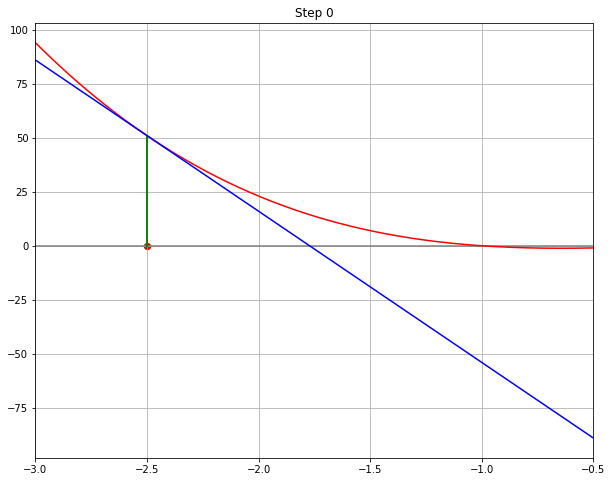

iter=  1 x= -1.77142857 err=4.403e-01


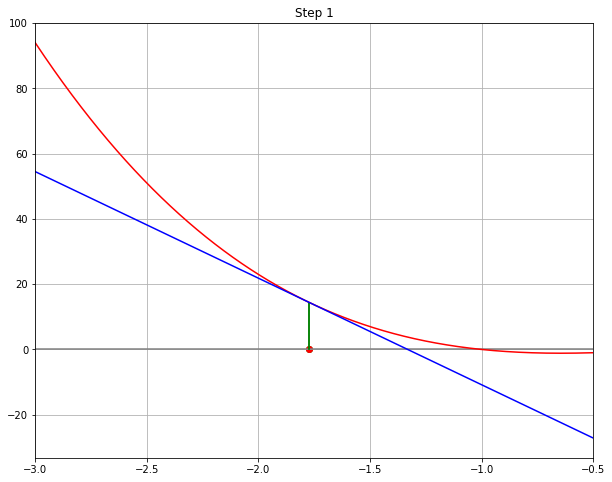

iter=  2 x= -1.33114945 err=2.324e-01


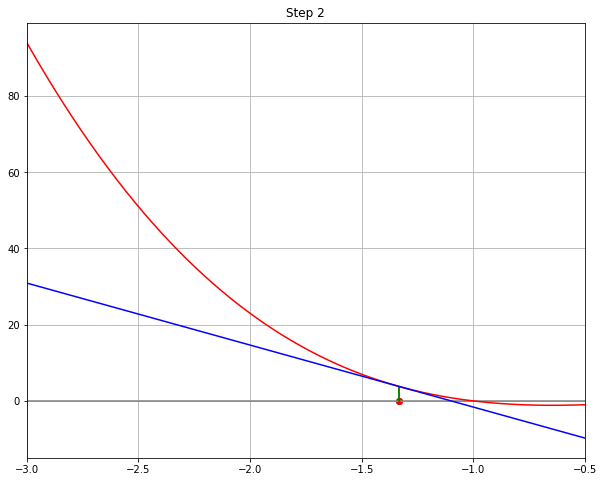

iter=  3 x= -1.09877514 err=8.562e-02


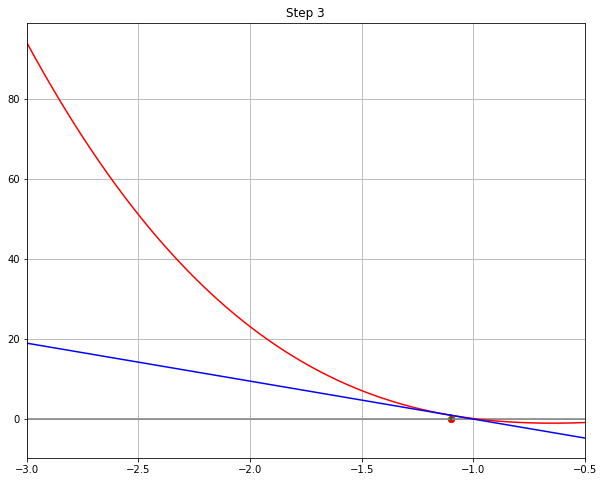

iter=  4 x= -1.01315263 err=1.287e-02


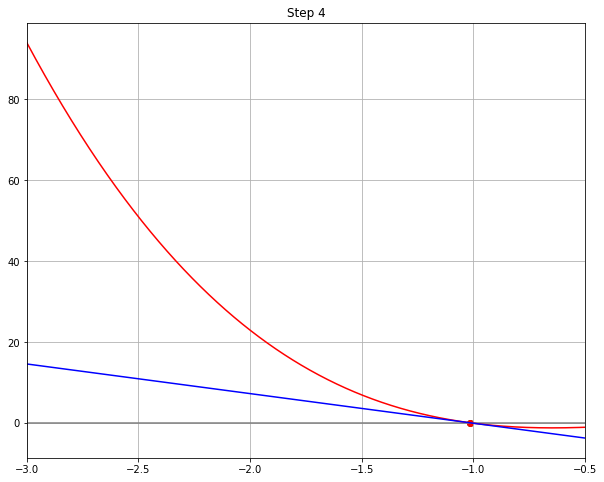

iter=  5 x= -1.00028617 err=2.860e-04
iter=  6 x= -1.00000014 err=1.403e-07
iter=  7 x= -1.00000000 err=3.375e-14
Solution is  -1.0


In [455]:
newton_viz(-2.5,-3,-.5)

iter=  0 x= -0.50000000 err=5.000e-01


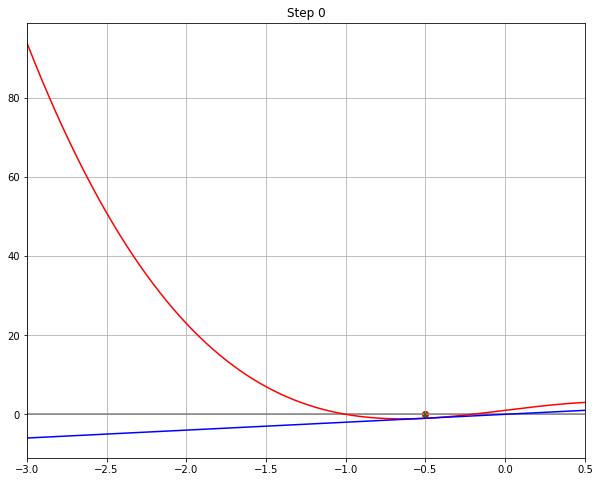

iter=  1 x=  0.00000000 err=2.000e-01


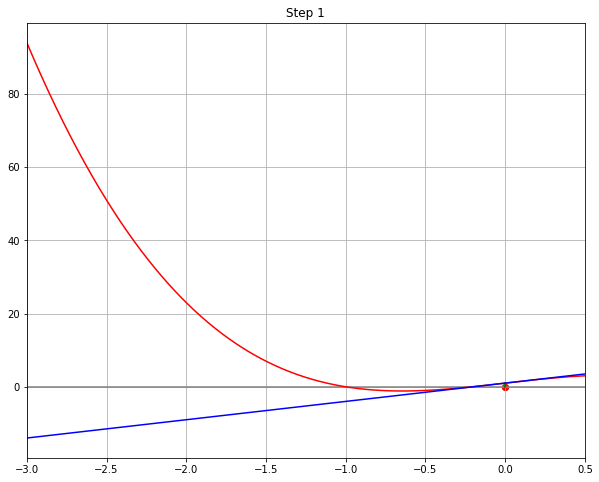

iter=  2 x= -0.20000000 err=7.080e-03
iter=  3 x= -0.20707965 err=2.713e-05
iter=  4 x= -0.20710678 err=4.079e-10
iter=  5 x= -0.20710678 err=2.776e-17
Solution is  -0.20710678118654754


In [456]:
newton_viz(-.5,-3,.5)

iter=  0 x=  0.50000000 err=1.500e+00


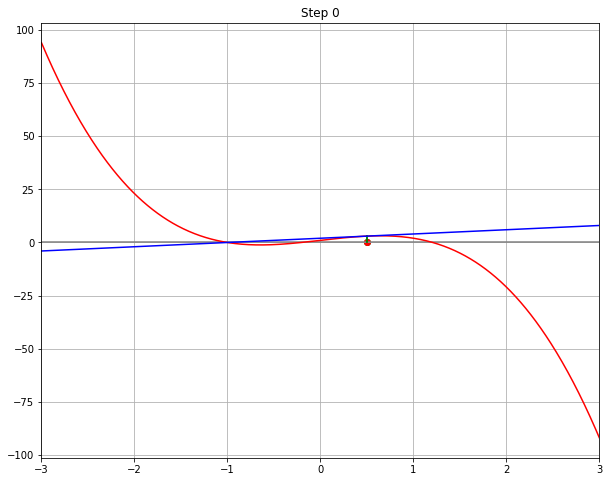

iter=  1 x= -1.00000000 err=0.000e+00
Solution is  -1.0


In [457]:
newton_viz(.5,-3,3)

## Rates of convergence

Bisections: **linear convergence**

Newton: **quadratic convergence**

In [458]:
g = lambda x: -4*x**3+5*x+1
h = lambda x: -12*x**2+5
print('%4s %12s %10s\n%s' % ('iter','x','err','-'*30))
callback = lambda iter,x,x1,err: print('%4d %12.8f %10.3e' % (iter,x,err))
root = newton(g, h, x0, callback=callback)
print('Newton solution is ',root)

iter            x        err
------------------------------
   0  -2.50000000  7.286e-01
   1  -1.77142857  4.403e-01
   2  -1.33114945  2.324e-01
   3  -1.09877514  8.562e-02
   4  -1.01315263  1.287e-02
   5  -1.00028617  2.860e-04
   6  -1.00000014  1.403e-07
   7  -1.00000000  3.375e-14
Newton solution is  -1.0


In [459]:
a, b = -3, -0.5
print('%4s %12s %10s\n%s' % ('iter','x','err','-'*30))
callback = lambda iter,x,a,b: print('%4d %12.8f %10.3e' % (iter,x,np.abs(b-a)))
root = bisection(g,lower=a,upper=b,callback=callback)

iter            x        err
------------------------------
   0  -1.75000000  2.500e+00
   1  -1.12500000  1.250e+00
   2  -0.81250000  6.250e-01
   3  -0.96875000  3.125e-01
   4  -1.04687500  1.562e-01
   5  -1.00781250  7.812e-02
   6  -0.98828125  3.906e-02
   7  -0.99804688  1.953e-02
   8  -1.00292969  9.766e-03
   9  -1.00048828  4.883e-03
  10  -0.99926758  2.441e-03
  11  -0.99987793  1.221e-03
  12  -1.00018311  6.104e-04
  13  -1.00003052  3.052e-04
  14  -0.99995422  1.526e-04
  15  -0.99999237  7.629e-05
  16  -1.00001144  3.815e-05
  17  -1.00000191  1.907e-05
  18  -0.99999714  9.537e-06
  19  -0.99999952  4.768e-06
  20  -1.00000072  2.384e-06
  21  -1.00000012  1.192e-06


## Newton methods with constraints (robust Newton)

Depending on starting value, Newton may initially shoot very far away.
When simple bounds can be set, they are useful to moderate the Newton step (at
the cost of some additional computation at each iteration).
Similarly to the bisection method, we assume that the signs of the function are
different at the bounds.

Algorithm:
1. Given the upper and lower bounds, let $ x_0 $ be the midpoint between the bounds.
2. Calculate Newton-Raphson step: $ x_{i+1} = x_i - \frac{g(x_i)}{g'(x_i)} $
3. If $ x_{i+1} $ falls outside of the bounds, perform a bisection step.
4. Iterate until convergence in some metric

In [460]:
def bnewton(fun, grad, lower=0, upper=1, tol=1e-6, maxiter=100, callback=None):
    '''Polyalgorithm that combines bisections and Newton-Raphson
       to solve fun(x)=0 within given lower and upper bounds.
       Callback function arguments (iter,itertype,x,x1,lower,upper)
    '''
    sign_lower = np.sign(fun(lower))
    sign_upper = np.sign(fun(upper))
    if sign_lower*sign_upper>0:
        raise(ValueError('Bad initial lower and upper limits'))
    x = (lower+upper)/2
    for iter in range(maxiter):
        newt = x - fun(x)/grad(x) # Newton step
        if newt<lower or newt>upper:
            # bisection step
            if np.sign(fun(x))*sign_lower > 0:
                if callback:
                    callback(iter,'bisect',x,(x+upper)/2,lower,upper)
                lower = x  # and the lower sign remains
            else:
                if callback:
                    callback(iter,'bisect',x,(x+lower)/2,lower,upper)
                upper = x  # and the upper sign remains
            x1 = (lower+upper)/2
            stopping = np.abs(upper-lower)
        else:
            x1 = newt
            stopping = np.abs(x1-x)
            if callback:
                callback(iter,'newton',x,x1,lower,upper)
        x = x1
        if stopping<tol:
            return x1
    else:
        raise(RuntimeError('Failed to converge, increase maxiter'))

Create and run example with different starting values

In [461]:
def bnewton_viz(a,b):
    g = lambda x: -4*x**3+5*x+1
    h = lambda x: -12*x**2+5
    ylim=[g(a),min(g(b),0)]
    def callback(iter,type,x,x1,a1,b1):
        print('iter=%3d type=%s x=%12.8f -> %12.8f [lower,upper]=[%5.3f,%5.3f]' % (iter,type,x,x1,a1,b1))
        if np.abs(x-x1)>0.001 and np.abs(a1-b1)>0.01: # plot only if sufficiently far from the solution
            multiplot([a,0,b,0],color='grey')
            plt.title('Step %d' % iter)
            multiplot(g,a=a,b=b,color='red')
            multiplot([x,0,g(x)],a=a,b=b,color='grey')
            multiplot(lambda z: h(x)*(z - x + g(x)/h(x)),a=a,b=b,color='blue')
            if type=='bisect':
                multiplot([a1,ylim[0],a1,ylim[1]],a=a,b=b,color='green')
                multiplot([b1,ylim[0],b1,ylim[1]],a=a,b=b,color='green')
                multiplot([x,ylim[0],x,ylim[1]],a=0,b=1,color='green')
                multiplot([x1,ylim[0],x1,ylim[1]],a=a,b=b,color='green')
            multiplot([x1,0],a=a,b=b,color='blue',show=True)
    root = bnewton(g, h, a, b, callback=callback)
    print('Solution is ',root)

iter=  0 type=bisect x= -0.62500000 ->  -1.56250000 [lower,upper]=[-2.500,1.250]


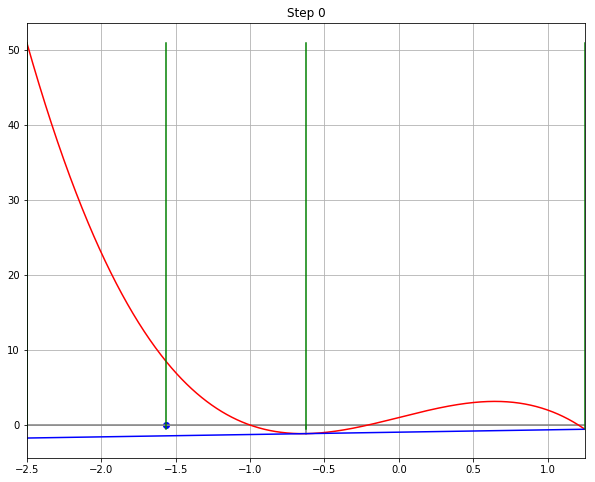

iter=  1 type=newton x= -1.56250000 ->  -1.21487138 [lower,upper]=[-2.500,-0.625]


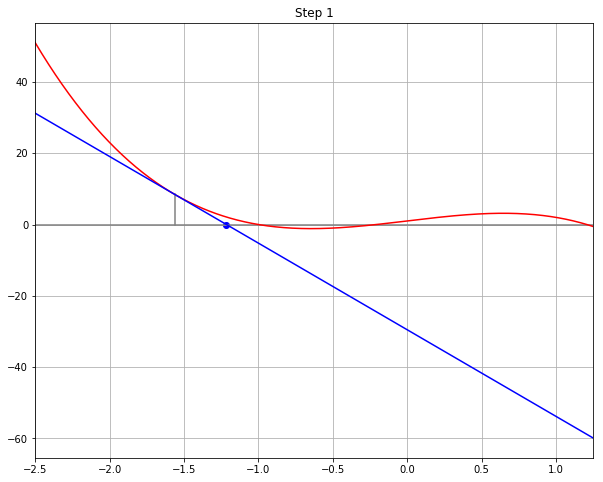

iter=  2 type=newton x= -1.21487138 ->  -1.04983113 [lower,upper]=[-2.500,-0.625]


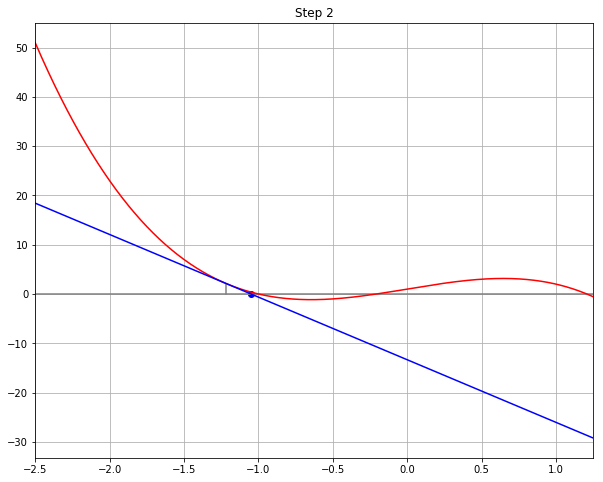

iter=  3 type=newton x= -1.04983113 ->  -1.00374283 [lower,upper]=[-2.500,-0.625]


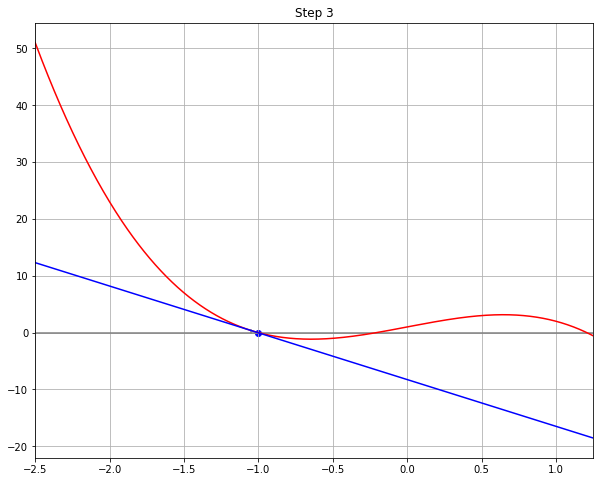

iter=  4 type=newton x= -1.00374283 ->  -1.00002377 [lower,upper]=[-2.500,-0.625]


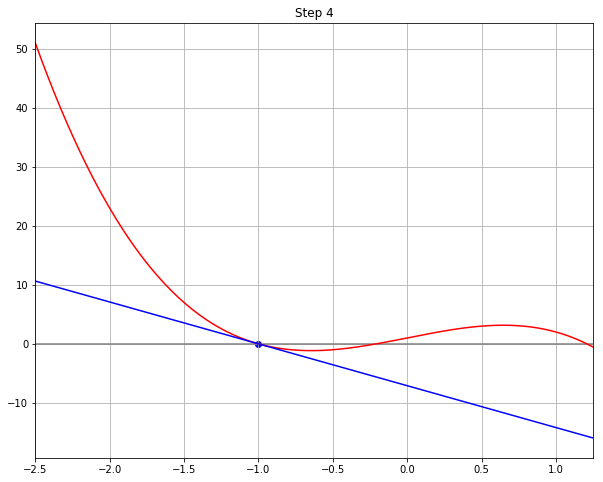

iter=  5 type=newton x= -1.00002377 ->  -1.00000000 [lower,upper]=[-2.500,-0.625]
iter=  6 type=newton x= -1.00000000 ->  -1.00000000 [lower,upper]=[-2.500,-0.625]
Solution is  -1.0


In [462]:
bnewton_viz(-2.5,1.25)

iter=  0 type=bisect x=  0.62500000 ->   2.18750000 [lower,upper]=[-2.500,3.750]


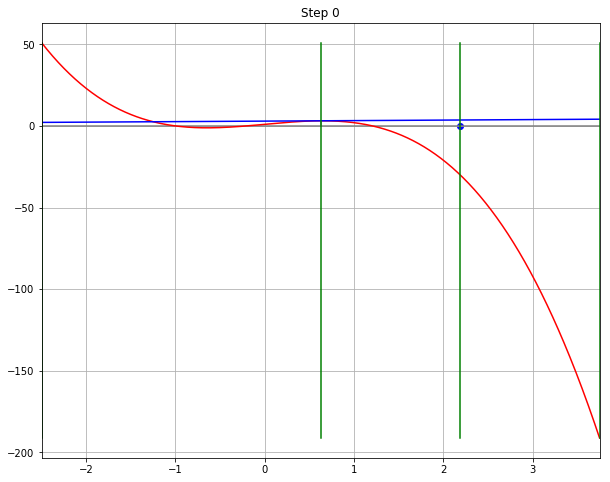

iter=  1 type=newton x=  2.18750000 ->   1.61650522 [lower,upper]=[0.625,3.750]


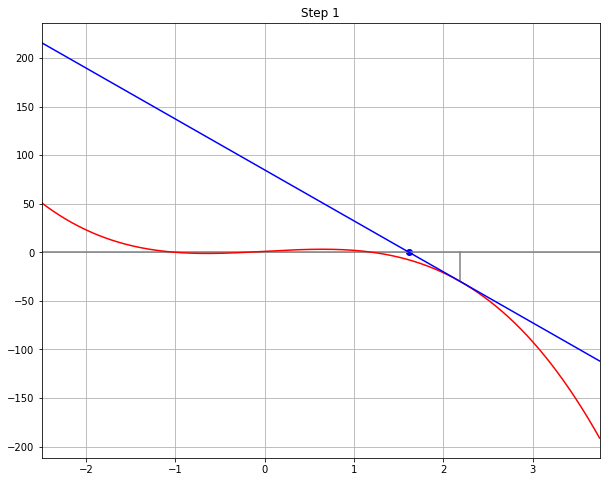

iter=  2 type=newton x=  1.61650522 ->   1.32004727 [lower,upper]=[0.625,3.750]


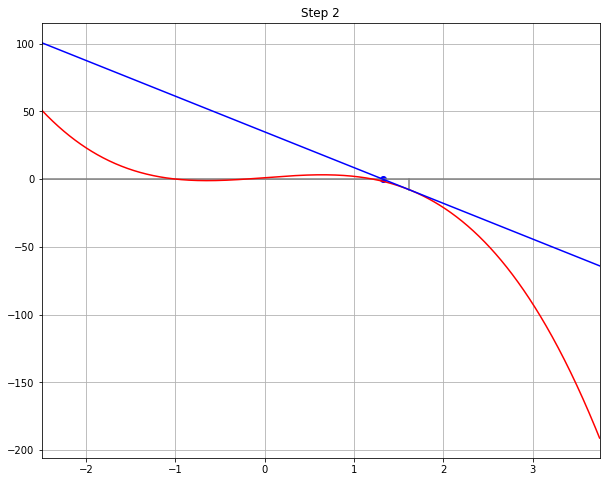

iter=  3 type=newton x=  1.32004727 ->   1.21944425 [lower,upper]=[0.625,3.750]


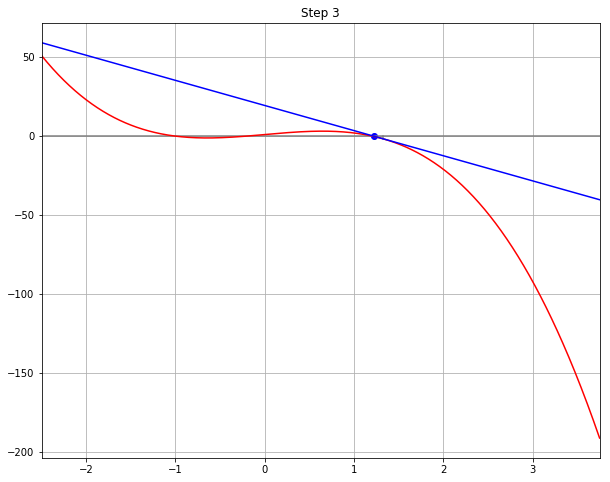

iter=  4 type=newton x=  1.21944425 ->   1.20727961 [lower,upper]=[0.625,3.750]


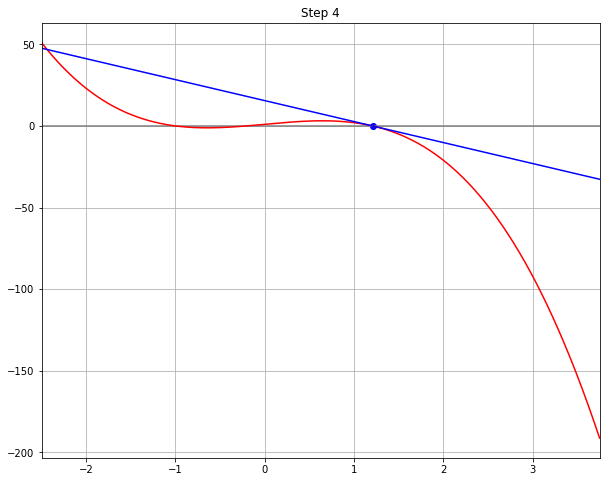

iter=  5 type=newton x=  1.20727961 ->   1.20710682 [lower,upper]=[0.625,3.750]
iter=  6 type=newton x=  1.20710682 ->   1.20710678 [lower,upper]=[0.625,3.750]
Solution is  1.207106781186549


In [463]:
bnewton_viz(-2.5,3.75)

One more particularly nasty case of the equation $ a \log(x) + b \log(1-x) + c = 0 $,
$ ab<0 $, which is only defined on the open interval $ (0,1) $ and which single root
can be arbitrary close to either 0 or 1.
This equation arises in the models of discrete choice, for example when computing a mixed
strategy equilibrium in a two players game with binary actions.

In [464]:
def loglog(a,b,c):
    g = lambda x: a*np.log(x) + b*np.log(1-x) + c
    h = lambda x: a/x - b/(1-x)
    ylim=[min(0,c-10),max(0,c+10)]
    def callback(iter,type,x,x1,a1,b1):
        print('iter=%3d type=%s x=%12.8f -> %12.8f [lower,upper]=[%5.3f,%5.3f]' % (iter,type,x,x1,a1,b1))
        if np.abs(x-x1)>0.001 and np.abs(a1-b1)>0.01: # plot only if sufficiently far from the solution
            multiplot([0,0,1,0],color='grey')
            plt.title('Step %d' % iter)
            multiplot(g,a=0,b=1,color='red')
            multiplot([x,0,g(x)],a=0,b=1,color='grey')
            multiplot(lambda z: h(x)*(z - x + g(x)/h(x)),a=0,b=1,color='blue')
            if type=='bisect':
                multiplot([a1,ylim[0],a1,ylim[1]],a=0,b=1,color='green')
                multiplot([b1,ylim[0],b1,ylim[1]],a=0,b=1,color='green')
                multiplot([x,ylim[0],x,ylim[1]],a=0,b=1,color='green')
                multiplot([x1,ylim[0],x1,ylim[1]],a=0,b=1,color='green')
            multiplot([x1,0],a=0,b=1,color='blue',show=True)
    root = bnewton(g, h, 0, 1, callback=callback)
    print('Solution is ',root)

iter=  0 type=bisect x=  0.50000000 ->   0.25000000 [lower,upper]=[0.000,1.000]


/Users/fedor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


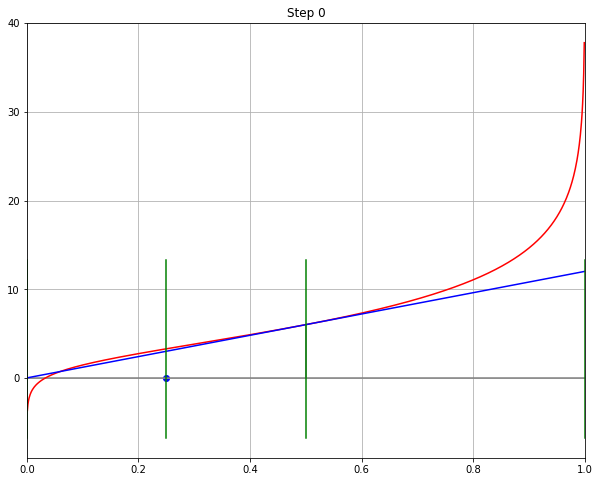

iter=  1 type=bisect x=  0.25000000 ->   0.12500000 [lower,upper]=[0.000,0.500]


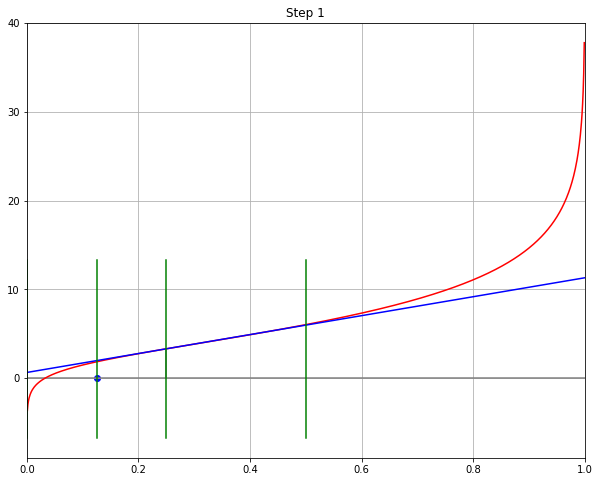

iter=  2 type=bisect x=  0.12500000 ->   0.06250000 [lower,upper]=[0.000,0.250]


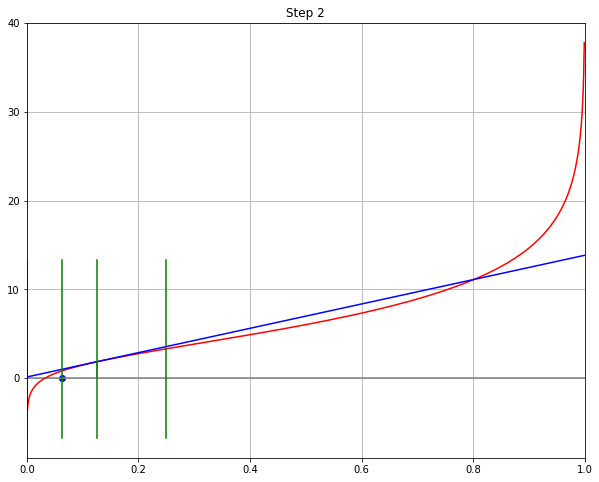

iter=  3 type=newton x=  0.06250000 ->   0.02499513 [lower,upper]=[0.000,0.125]


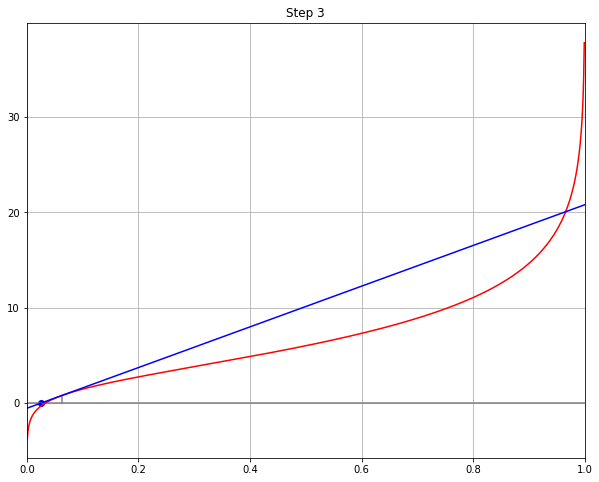

iter=  4 type=newton x=  0.02499513 ->   0.03191888 [lower,upper]=[0.000,0.125]


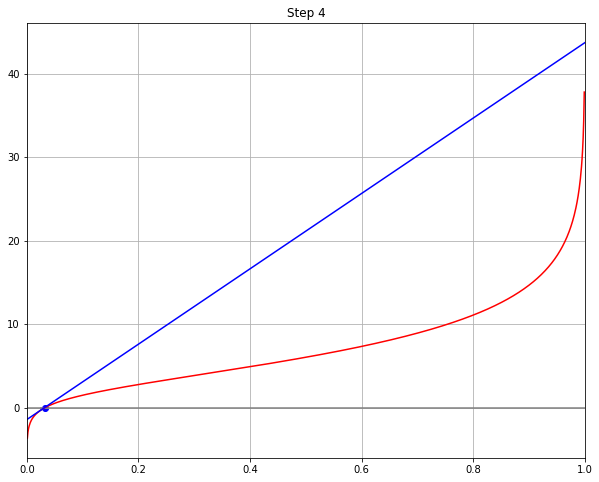

iter=  5 type=newton x=  0.03191888 ->   0.03280561 [lower,upper]=[0.000,0.125]
iter=  6 type=newton x=  0.03280561 ->   0.03281618 [lower,upper]=[0.000,0.125]
iter=  7 type=newton x=  0.03281618 ->   0.03281618 [lower,upper]=[0.000,0.125]
Solution is  0.03281618140067694


In [465]:
loglog(1,-5,3.25)

iter=  0 type=bisect x=  0.50000000 ->   0.75000000 [lower,upper]=[0.000,1.000]


/Users/fedor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


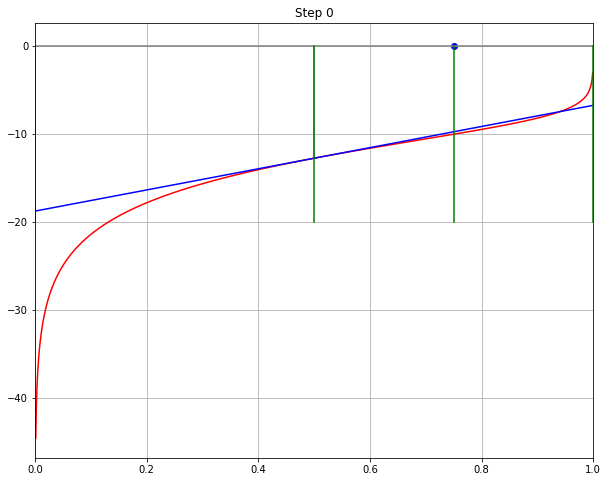

iter=  1 type=bisect x=  0.75000000 ->   0.87500000 [lower,upper]=[0.500,1.000]


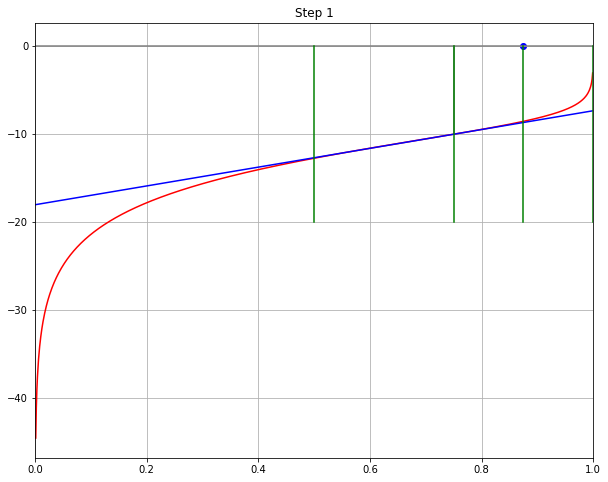

iter=  2 type=bisect x=  0.87500000 ->   0.93750000 [lower,upper]=[0.750,1.000]


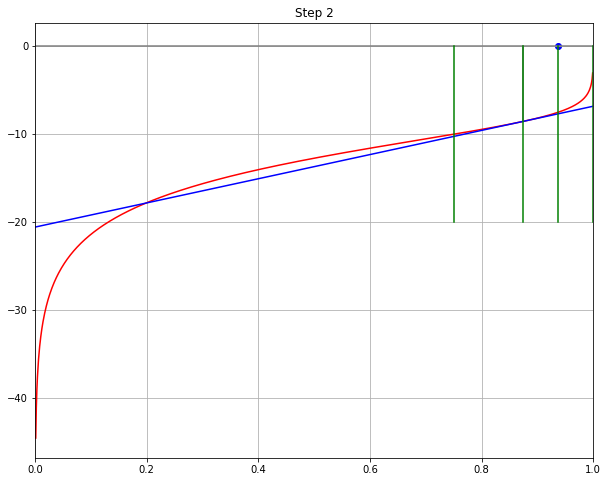

iter=  3 type=bisect x=  0.93750000 ->   0.96875000 [lower,upper]=[0.875,1.000]


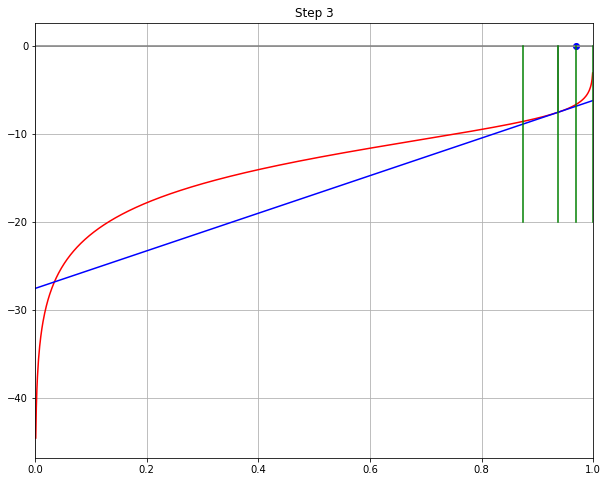

iter=  4 type=bisect x=  0.96875000 ->   0.98437500 [lower,upper]=[0.938,1.000]


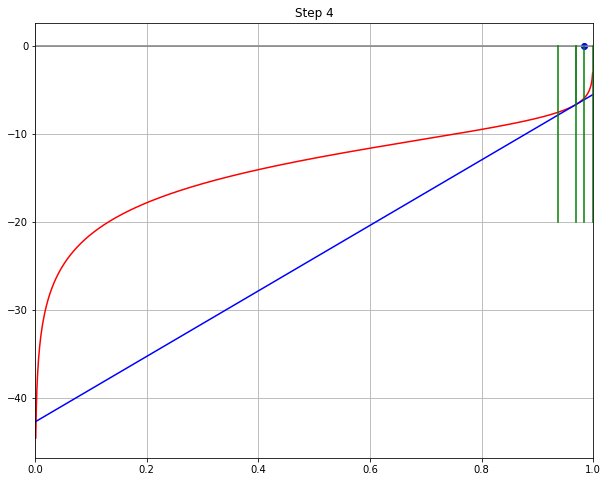

iter=  5 type=bisect x=  0.98437500 ->   0.99218750 [lower,upper]=[0.969,1.000]


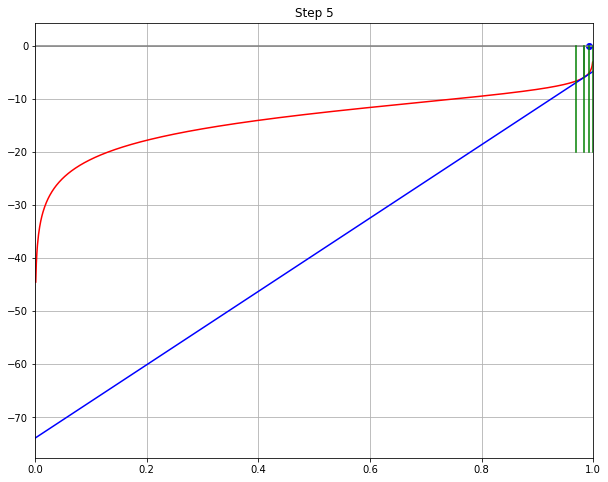

iter=  6 type=bisect x=  0.99218750 ->   0.99609375 [lower,upper]=[0.984,1.000]


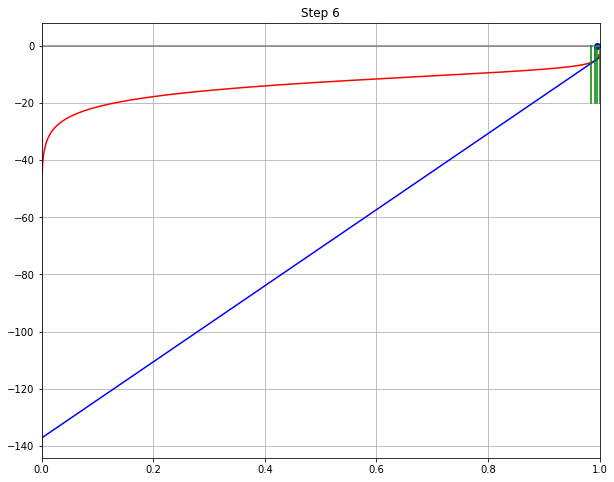

iter=  7 type=bisect x=  0.99609375 ->   0.99804688 [lower,upper]=[0.992,1.000]
iter=  8 type=bisect x=  0.99804688 ->   0.99902344 [lower,upper]=[0.996,1.000]
iter=  9 type=bisect x=  0.99902344 ->   0.99951172 [lower,upper]=[0.998,1.000]
iter= 10 type=bisect x=  0.99951172 ->   0.99975586 [lower,upper]=[0.999,1.000]
iter= 11 type=bisect x=  0.99975586 ->   0.99987793 [lower,upper]=[1.000,1.000]
iter= 12 type=newton x=  0.99987793 ->   0.99999867 [lower,upper]=[1.000,1.000]
iter= 13 type=newton x=  0.99999867 ->   0.99999397 [lower,upper]=[1.000,1.000]
iter= 14 type=newton x=  0.99999397 ->   0.99998180 [lower,upper]=[1.000,1.000]
iter= 15 type=newton x=  0.99998180 ->   0.99996516 [lower,upper]=[1.000,1.000]
iter= 16 type=newton x=  0.99996516 ->   0.99995595 [lower,upper]=[1.000,1.000]
iter= 17 type=newton x=  0.99995595 ->   0.99995463 [lower,upper]=[1.000,1.000]
iter= 18 type=newton x=  0.99995463 ->   0.99995461 [lower,upper]=[1.000,1.000]
Solution is  0.9999546103770559


In [466]:
loglog(5,-1,-10)

### Rate of convergence of the polyalgorithm

In [467]:
def loglog_rate(a,b,c):
    g = lambda x: a*np.log(x) + b*np.log(1-x) + c
    h = lambda x: a/x - b/(1-x)
    print('%4s %6s %12s %10s\n%s' % ('iter','type','x','err','-'*36))
    def callback (iter,type,x,x1,a1,b1):
        if type=='newton':
            err = np.abs(x-x1)
        else:
            err = np.abs(a1-b1)
        print('%4d %6s %12.8f %10.3e' % (iter,type,x,err))
    root = bnewton(g, h, 0, 1, callback=callback)
    print('Solution is ',root)

loglog_rate(5,-1,-10)

iter   type            x        err
------------------------------------
   0 bisect   0.50000000  1.000e+00
   1 bisect   0.75000000  5.000e-01
   2 bisect   0.87500000  2.500e-01
   3 bisect   0.93750000  1.250e-01
   4 bisect   0.96875000  6.250e-02
   5 bisect   0.98437500  3.125e-02
   6 bisect   0.99218750  1.562e-02
   7 bisect   0.99609375  7.812e-03
   8 bisect   0.99804688  3.906e-03
   9 bisect   0.99902344  1.953e-03
  10 bisect   0.99951172  9.766e-04
  11 bisect   0.99975586  4.883e-04
  12 newton   0.99987793  1.207e-04
  13 newton   0.99999867  4.699e-06
  14 newton   0.99999397  1.217e-05
  15 newton   0.99998180  1.663e-05
  16 newton   0.99996516  9.219e-06
  17 newton   0.99995595  1.315e-06
  18 newton   0.99995463  1.981e-08
Solution is  0.9999546103770559


/Users/fedor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
